/Users/kjesse/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:26: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
/Users/kjesse/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:31: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


('world', 'loving', 'alright', 'along', 'girls', 'hard', 'different', 'fail', 'acting', 'give', 'thing', 'new', 'good', 'ah', 'enough', 'worry', 'chill', 'kissing', 'shoot', 'lie', 'why', 'dream', 'hurt', 'answer', 'forget', 'singing', 'hope', 'million', 'bones', 'than', 'theres', 'oo', 'some', 'covers', 'secret', 'oooh', 'wrong', 'ny', 'die', 'move', 'treat', 'wasnt', 'ooooh', 'other', 'motherfucker', 'well', 'satisfied', 'listen', 'much', 'else')


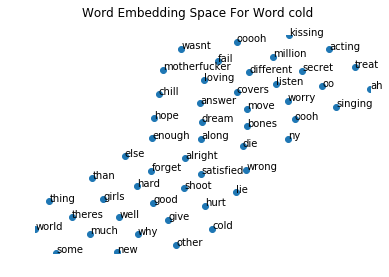

/Users/kjesse/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:58: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


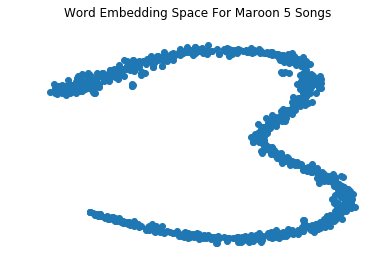

In [19]:
from gensim.models import Word2Vec
from gensim.models.word2vec import LineSentence


    
    
    
sentences = LineSentence('./data/sentences.txt')
# with open('./data/sentences.txt') as f:
#     content = f.read().replace('\n', '')
model = Word2Vec(sentences)


import numpy as np
import matplotlib.pyplot as plt
 
from sklearn.manifold import TSNE

# print(b.most_similar('love', topn=5))
# print(sentences)




target = 'cold'
t = model.most_similar(target,topn=50)
sim = list(zip(*t))
arr = []
sim0 = list(sim[0]) +[target]
for word in sim0:
        arr.append(model[word])
# arr.append(model['love'])
arr = np.array(arr)

# find tsne coords for 2 dimensions
tsne = TSNE(n_components=2, random_state=0)
np.set_printoptions(suppress=True)
Y = tsne.fit_transform(arr)

x_coords = Y[:, 0]
y_coords = Y[:, 1]

# display scatter plot
plt.figure(1)
plt.scatter(x_coords, y_coords)
print(sim[0])
for label, x, y in zip(sim0, x_coords, y_coords):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
# plt.title("Word Embedding Space For Word cold")
plt.suptitle("Word Embedding Space For Word cold")
plt.axis('off')
plt.show()



X = model[model.wv.vocab]

# tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

plt.scatter(X_tsne[:, 0], X_tsne[:, 1])
plt.suptitle("Word Embedding Space For Maroon 5 Songs")
plt.axis('off')
plt.show()